### 前端编程说明
本文通过一段简单的python代码，解释怎么使用三体API。
#### 绘制三体运行轨迹
首先导入需要用到的包。

|包名|用途|
|:---|:---|
|requests|调用API，将需要计算的参数传给后端，并获得计算结果|
|json|解析计算结果，将得到的json文件解析成文本|
|numpy|将计算结果存储为数组|
|matplotlib|将结果绘图呈现|

In [9]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

我们调用服务API，将需要计算的参数传给后端的服务。
后端服务的端口是8080，路径是threebody。我们将参数封装成json格式，post到后端。
参数说明如下：

|参数|含义|示例|
|:---|:---|:---|
|duration|计算多少秒（三体会一直运动，但计算时长不能无限）|40.0|
|dt|得到的离散结果的时间颗粒读|0.01|
|m1,m2,m3|三体的质量|1,1,1|
|x1,y1|第一个天体的位置坐标|-1,0|
|vx1,vy1|第一个天体的初速度|0.5379557207，0.3414578545|
|x2,y2|第二个天体的位置坐标|1,0|
|vx2,vy2|第二个天体的初速度|0.5379557207，0.3414578545|
|x3,y3|第三个天体的位置坐标|0,0|
|vx3,vy3|第三个天体的初速度|-1.0759114414，-0.682915709|

将参数post到后端服务后，后端做出响应，我们得到json格式的结果resp。（下面的代码是本机调试用的，如果后端的API服务不在本机，需要将127.0.0.1改成服务的地址。）

In [22]:
from requests import post
req = '{"duration":40.0,"dt":0.01,"m1":1.0,"x1":-1,"y1":0,"vx1":0.5379557207,"vy1":0.3414578545,"m2":1.0,"x2":1.0,"y2":0.0,"vx2":0.5379557207,"vy2":0.3414578545,"m3":1.0,"x3":0.0,"y3":0.0,"vx3":-1.0759114414,"vy3":-0.682915709}'
resp = post('http://127.0.0.1:8080/threebody/', data = req )

下面我们解析resp为data，它的变量类型是个字典。
我们索引出三体的坐标数组，它们分别为x1,y1,x2,y2,x3,y3。

In [23]:
data = json.loads(resp.text)
x1 = np.array(data['x1'])
y1 = np.array(data['y1'])
x2 = np.array(data['x2'])
y2 = np.array(data['y2'])
x3 = np.array(data['x3'])
y3 = np.array(data['y3'])

下面我们用三体的坐标绘制三体的轨迹

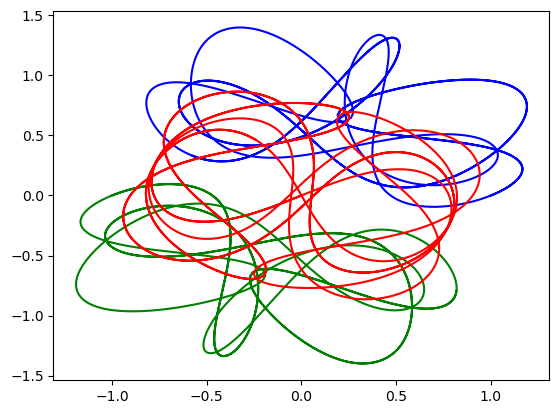

In [24]:
plt.plot(x1,y1,color='green')
plt.plot(x2,y2,color='blue')
plt.plot(x3,y3,color='red')
plt.show()

这3个天体的轨迹虽然很复杂，我们需要知道，这是个稳定的周期解，不是混沌解。由于这个周期解很复杂，对于三体星系里的观察者，这可能也会被当成“乱纪元”。

#### 其它

前面说了，调用API得到的响应resp是json格式，它里面的x1,y1,x2,y2,x3,y3分别为三体运动轨迹的坐标组成的数组。此外，resp里面还有n和t。其中n是轨迹坐标数组的大小，如本例中n如下：

In [25]:
data['n']

4001

而其中的t是离散的时间数组，里面的时间和上面坐标是一一对应的，我们可以用这些数据做成三体运行的动画。

In [17]:
data['t']

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.1300000000000001,
 1.1400000000000001,
 1.1500000000000001,
 1.16,
 1.17,
 1.18,

下表是对调用API响应结果里的内容的小结：

|数据名称|含义|
|:---|:---|
|n|返回的时间、坐标数组的长度|
|t|时间数组，长度为n|
|x1,y1,x2,y2,x3,y3|三体的坐标数组，每个长度均为n|

后记：其实稳定的周期解并不常见，混沌解也不容易得到，大多数时候我们得到的都是三体远离或合并的解。enjoy it!